In [123]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, 
    ConfusionMatrixDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from scikitplot.metrics import plot_roc_curve

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float','{:.2f}'.format)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [2]:
data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/Data Analytics/Kaggle/Lending Club loan data/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
missing_val_count = data.isnull().sum()
cols_with_missing_data = missing_val_count[missing_val_count>0].index. tolist()
cols_with_missing_data

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

In [6]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel ='Count',
    width = 500, height=350
)

:Bars   [index]   (loan_status)

C:\Users\harsh\AppData\Local\Temp\ipykernel_12460\3212862335.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


<Axes: >

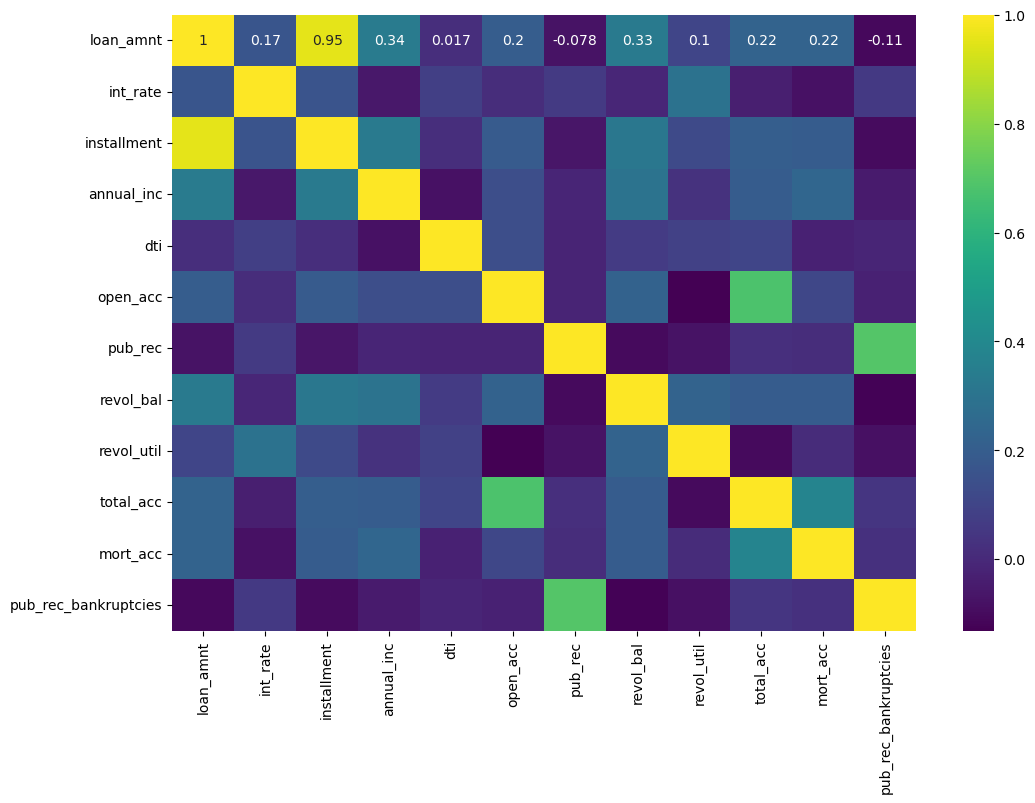

In [7]:
# plt.figure(figsize=(15,8))
# sns.heatmap(data.corr(), annot=True, fmt=".2f",        # show 2 decimal places
#     cmap='viridis',       # higher contrast
#     annot_kws={"size":8}
# )
# plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [8]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False,
    width=500, height=400, bins=50, alpha=0.4,
    title="Installment", ylabel = 'Counts', lengend ='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False,
    width=500, height=400, bins=50, alpha=0.4,
    title="Installment", ylabel = 'Counts', lengend ='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [9]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=500, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)
installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=500, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box


:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [10]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [11]:
print(f'Grade Unique: {sorted(data.grade.unique())}')
print(f'Sub Grade Unique: {sorted(data.sub_grade.unique())}')

Grade Unique: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Sub Grade Unique: ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [12]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status'] == 'Charged Off', 'grade'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [13]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Sub-Grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

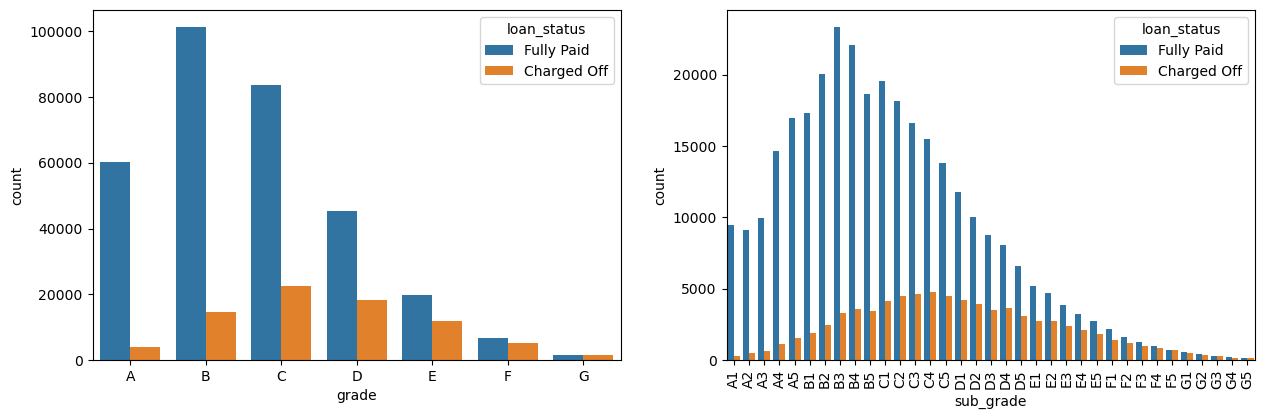

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='sub_grade', ylabel='count'>

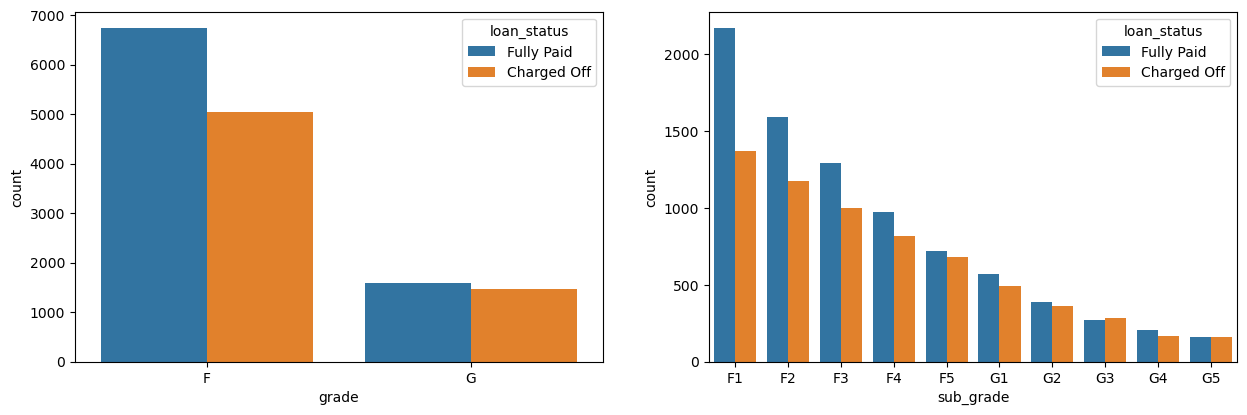

In [15]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [16]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [17]:
fully_paid = data.loc[data['loan_status']=='Fully Paid','home_ownership'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status']=='Charged Off','home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Home_ownership :Overlay
      .Bars.Home_ownership.I  :Bars   [index]   (home_ownership)
      .Bars.Home_ownership.II :Bars   [index]   (home_ownership)
   .Bars.Home_ownership    :Bars   [index]   (home_ownership)

In [18]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

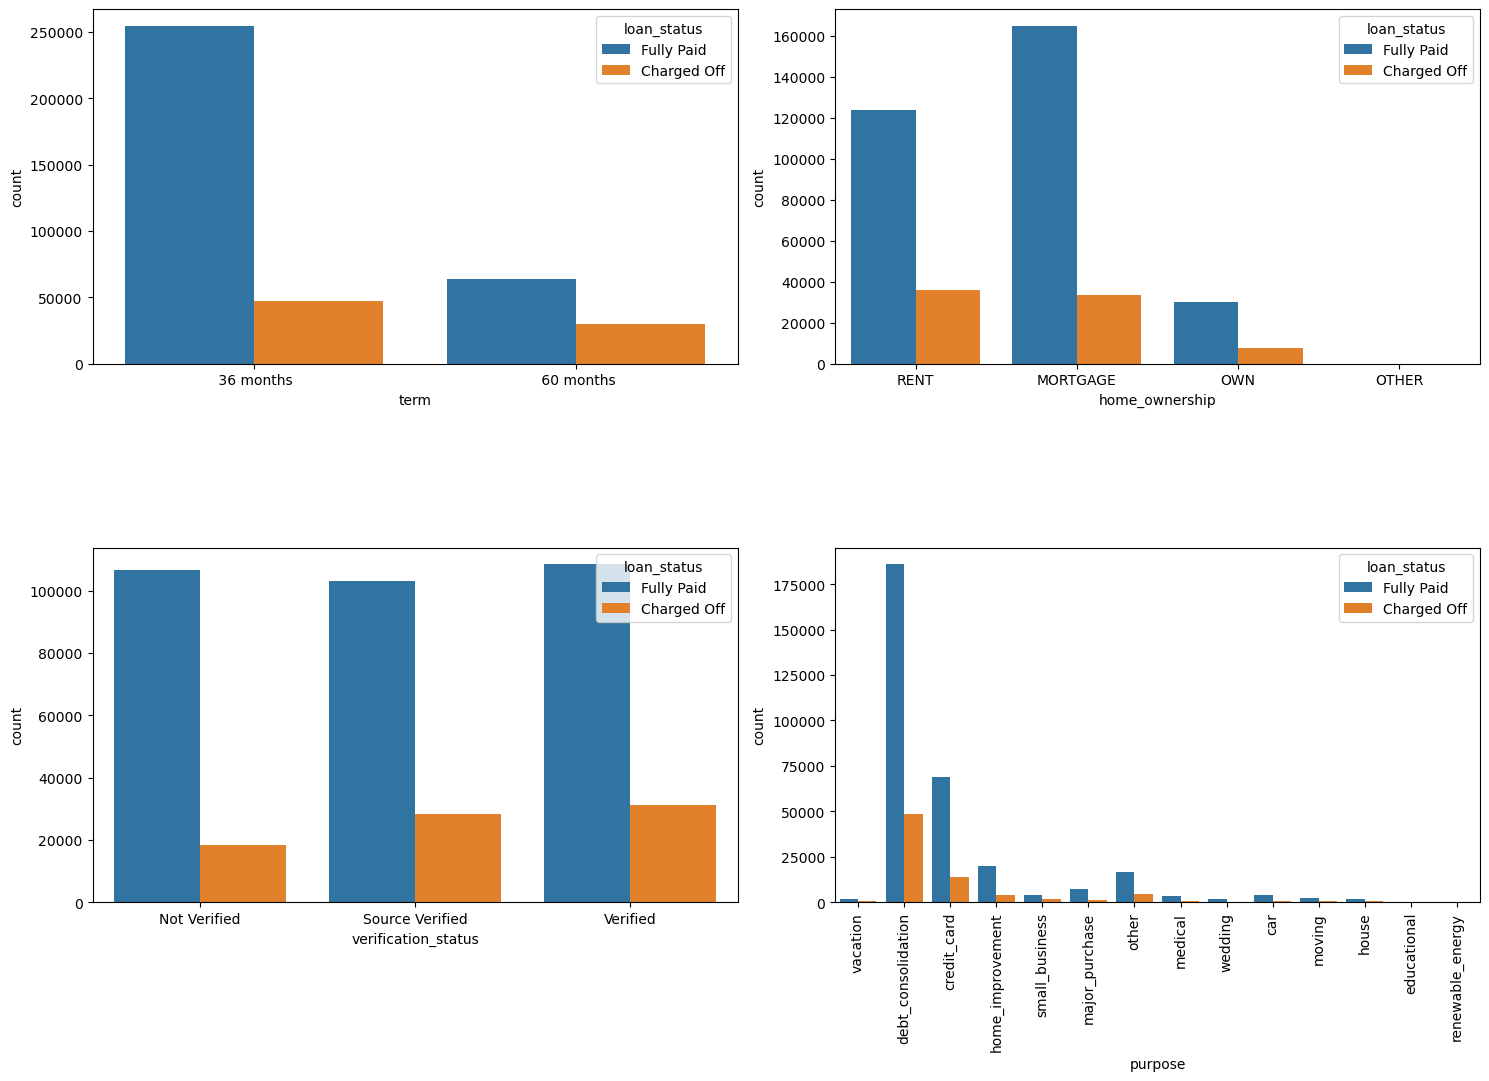

In [19]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')
plt.subplot(4,2,3)
sns.countplot(x='verification_status', data=data, hue='loan_status')
plt.subplot(4,2,4)
sns.countplot(x='purpose', data=data, hue='loan_status')
plt.xticks(rotation=90) 

plt.tight_layout()


In [20]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

In [21]:
int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [22]:
data [data.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width =500, height=400,
    title = "Loan Status by Annual Income(<=250000/Year)",
    xlabel='Annual Income', ylabel='Loan Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [23]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [24]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

Fully Paid     3509
Charged Off     568
Name: loan_status, dtype: int64

In [25]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

Fully Paid     65
Charged Off    10
Name: loan_status, dtype: int64

In [26]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [27]:
data['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

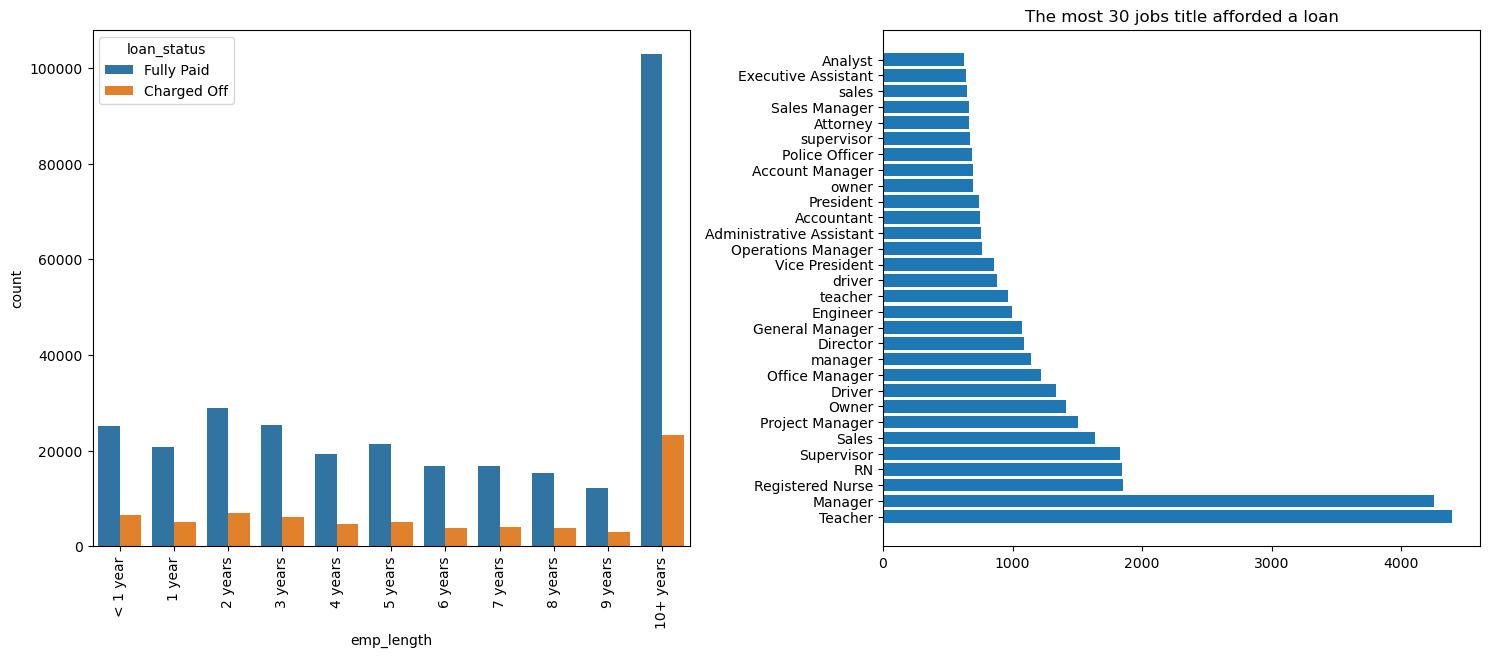

In [28]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [29]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [30]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status by Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
      .Histogram.II :Histogram   [issue_d]   (issue_d_count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
      .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

In [31]:
data.title.isna().sum()

1755

In [32]:
data['title'] = data.title.str.lower()

In [33]:
data.title.value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

title will be removed as purpose is generated from it

In [34]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [35]:
dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti Distribution", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=50) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [36]:
print(data[data['dti']>=40].shape)

(296, 27)


In [37]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

In [38]:
dti = data[data['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"

open_acc = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = data.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [39]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [40]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [41]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [42]:
revol_util = data.hvplot.hist(
    y='revol_util', by = 'loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by Revolving Line Utilization"

sub_revol_util = data[data['revol_util']<120].hvplot.hist(
    y='revol_util', by = 'loan_status', bins=50, width=300, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)

title="Loan Status by Revolving Line Utilization"

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [43]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,2014-04-01,Fully Paid,debt_consolidation,debt consolidation,14.67,1998-10-01,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


In [44]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [45]:
title = "Loan Status by Total credit revolving balance"

revol_bal = data.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top'
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = data[data['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

In [46]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

Fully Paid     351
Charged Off     46
Name: loan_status, dtype: int64

In [47]:
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec.I  :Bars   [index]   (pub_rec)
   .Bars.Pub_rec.II :Bars   [index]   (pub_rec)

In [48]:
xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right')

:Overlay
   .Bars.Initial_list_status.I  :Bars   [index]   (initial_list_status)
   .Bars.Initial_list_status.II :Bars   [index]   (initial_list_status)

In [49]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Application_type.I  :Bars   [index]   (application_type)
   .Bars.Application_type.II :Bars   [index]   (application_type)

In [50]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec_bankruptcies.I  :Bars   [index]   (pub_rec_bankruptcies)
   .Bars.Pub_rec_bankruptcies.II :Bars   [index]   (pub_rec_bankruptcies)

In [51]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [52]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

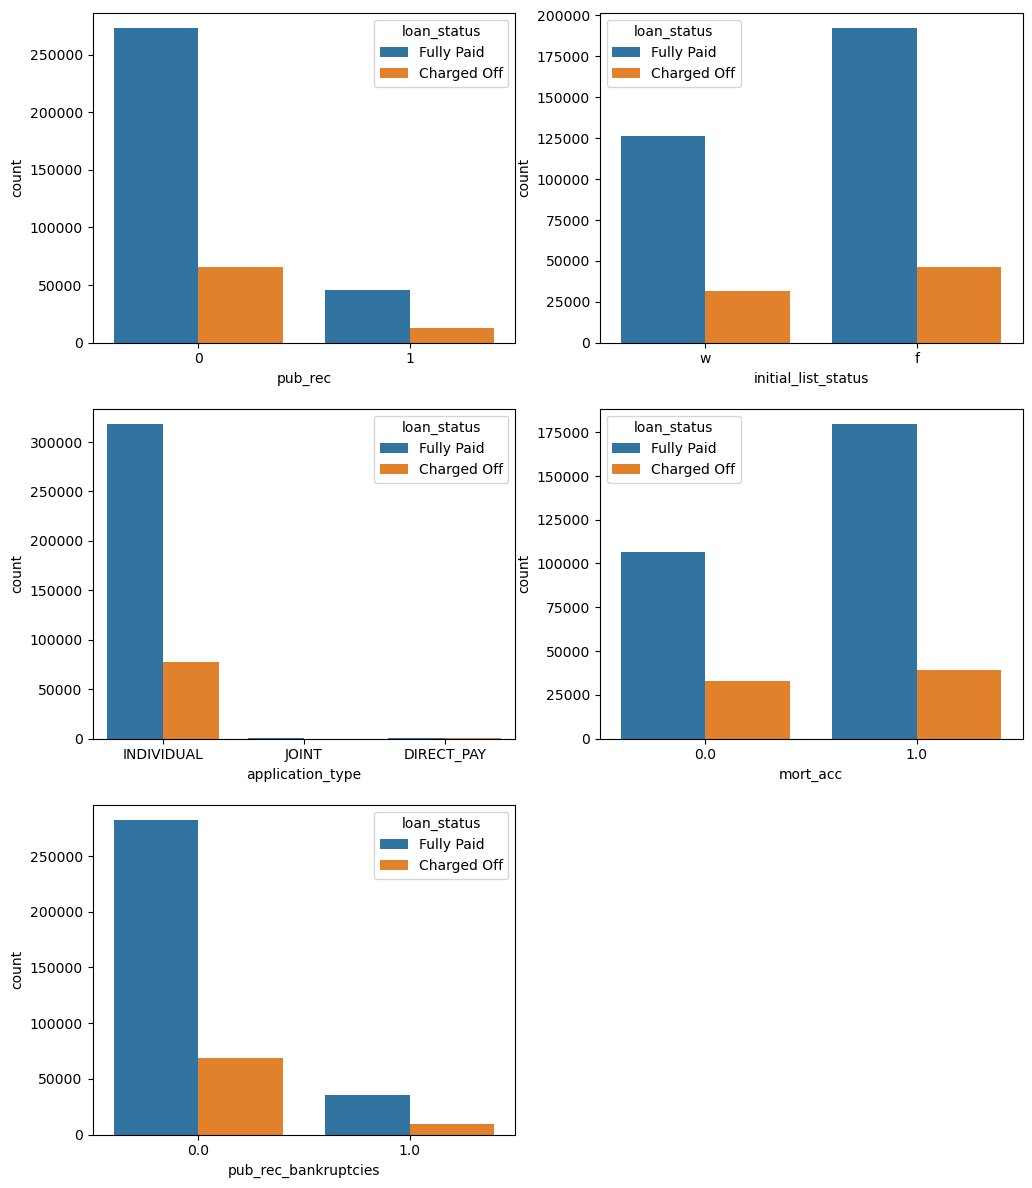

In [53]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [54]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [55]:
data.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

C:\Users\harsh\AppData\Local\Temp\ipykernel_12460\4071194275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(


:Bars   [index]   (loan_status)

## Data PreProcessing

In [56]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [57]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [58]:
data.drop('emp_title', axis=1, inplace=True)
data.drop('emp_length', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)

In [59]:
data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

C:\Users\harsh\AppData\Local\Temp\ipykernel_12460\2852832020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()


:Bars   [index]   (mort_acc)

In [60]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

C:\Users\harsh\AppData\Local\Temp\ipykernel_12460\3866828339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [61]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [62]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [63]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [64]:
data.dropna(inplace=True)

In [65]:
data.shape

(395219, 24)

### Categorical Variables and Dummy Variables

In [66]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [67]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [68]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)
data.term.unique()

array([36, 60], dtype=int64)

In [69]:
data.drop('grade', axis=1, inplace=True)

In [70]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)
data.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,2015-01-01,1,26.24,1990-06-01,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,2015-01-01,1,22.05,2004-07-01,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,2015-01-01,1,12.79,2007-08-01,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36,6.49,220.65,54000.00,2014-11-01,1,2.60,2006-09-01,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60,17.27,609.33,55000.00,2013-04-01,0,33.95,1999-03-01,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [75]:
data.zip_code.value_counts()

AttributeError: 'DataFrame' object has no attribute 'zip_code'

In [73]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [77]:
data.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,2015-01-01,1,26.24,1990-06-01,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,2015-01-01,1,22.05,2004-07-01,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,2015-01-01,1,12.79,2007-08-01,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,2014-11-01,1,2.60,2006-09-01,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,2013-04-01,0,33.95,1999-03-01,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
data.drop('address', axis=1, inplace=True)

In [79]:
data.drop('issue_d', axis=1, inplace=True)

In [81]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year
data.earliest_cr_line.nunique()

65

In [82]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [83]:
train, test = train_test_split(data, test_size=0.33, random_state=42)
print(train.shape)
print(test.shape)

(264796, 79)
(130423, 79)


### Removing Outliers

In [99]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(264776, 79)
(264796, 79)


In [100]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(264796, 79)
(262143, 79)


### Normalizing the data

In [109]:
X_train, y_train = train.drop('loan_status', axis =1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [110]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723      uint8
zip_code_48052      uint8
zip_code_70466      uint8
zip_code_86630      uint8
zip_code_93700      uint8
Length: 78, dtype: object

In [111]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Building

In [112]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [113]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

### ✔️ Artificial Neural Networks (ANNs)

In [114]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [115]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3

model = nn_model(
    num_columns=num_columns,
    num_labels= num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates, 
    learning_rate=learning_rate
)
r= model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    epochs = 20, 
    batch_size=32
)

Epoch 1/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8403 - loss: 0.3340 - val_AUC: 0.8924 - val_loss: 0.2719
Epoch 2/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8763 - loss: 0.2931 - val_AUC: 0.8980 - val_loss: 0.2668
Epoch 3/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.8809 - loss: 0.2865 - val_AUC: 0.8991 - val_loss: 0.2686
Epoch 4/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8846 - loss: 0.2843 - val_AUC: 0.8984 - val_loss: 0.2671
Epoch 5/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.8856 - loss: 0.2833 - val_AUC: 0.8983 - val_loss: 0.2710
Epoch 6/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8874 - loss: 0.2810 - val_AUC: 0.8995 - val_loss: 0.2673
Epoch 7/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.8889 - loss: 0.2795 - val_AUC: 0.8994 - val_loss: 0.2698
Epoch 8/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8889 - loss: 0.2797 - val_AUC: 0.9005 - val_loss: 0.2667
Epoch 9/20
8192/8192 ━━━━━━━━━━━

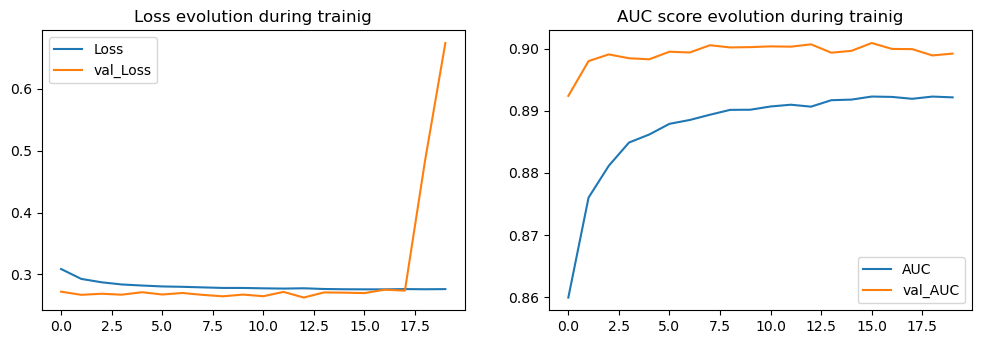

In [116]:
plot_learning_evolution(r)

In [117]:
y_test_pred  = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train = False)

4076/4076 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Test Result:
Accuracy Score: 88.67%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.89      0.89      0.89       0.89          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.62      0.93      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
_______________________________________________
Confusion Matrix: 
 [[ 12218  13262]
 [  1513 103430]]



In [118]:
score_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 8s 966us/step
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 4s 874us/step


### XGBoost Classifier

In [119]:
xgb_clf = XGBClassifier(use_label_encoder = False)
xgb_clf.fit(X_train, y_train)
y_train_pred=xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.60%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.66      0.94      0.90       0.80          0.88
support   51665.00 210478.00      0.90  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 26027  25638]
 [  1627 208851]]

Test Result:
Accuracy Score: 82.49%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.54      0.91      0.82       0.73          0.84
recall        0.67      0.86      0.82       0.77          0.82
f1-score      0.60      0.89      0.82       0.74          0.83
support   25480.00 104943.00      0.82  130423.00     130423.00
_________________________________________

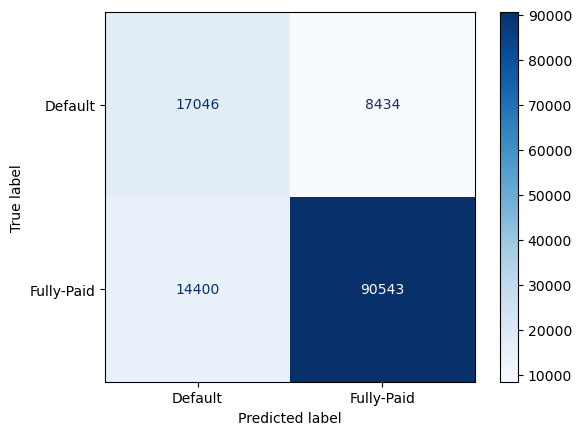

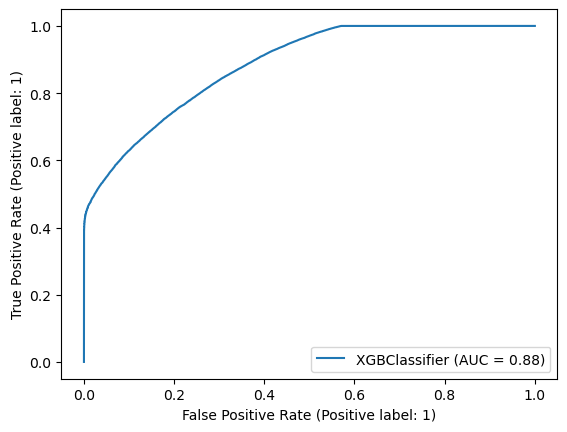

In [124]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default','Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [126]:
score_dict['XGBosot'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
    'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
}

In [127]:
score_dict

{'ANNs': {'Train': 0.9079452645274377, 'Test': 0.8990644824294316},
 'XGBosot': {'Train': 0.7480173067642183, 'Test': 0.7658889719321504}}

### ✔️ Random Forest Classifier

In [129]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 51662      3]
 [     0 210478]]

Test Result:
Accuracy Score: 88.61%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.93      0.88      0.89       0.90          0.89
recall        0.45      0.99      0.89       0.72          0.89
f1-score      0.61      0.93      0.89       0.77          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
________________________________________

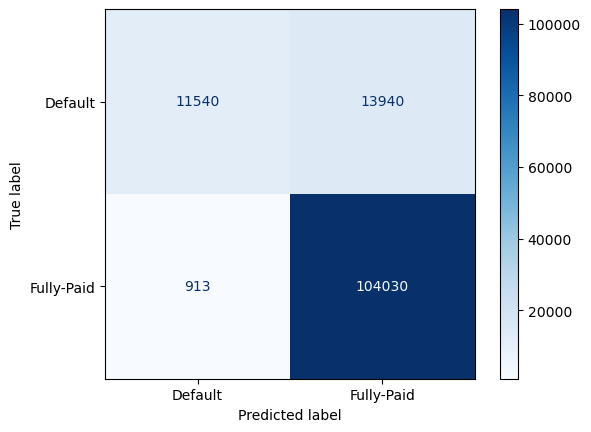

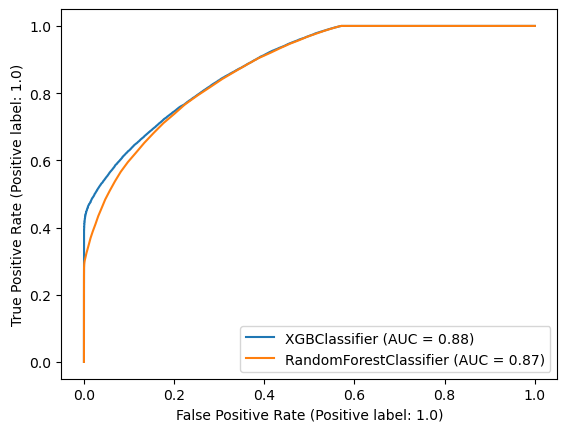

In [130]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                                             cmap='Blues', values_format='d',
                                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [131]:
score_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

### 📊 Comparing Models Prerformance

In [132]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.722
XGBOOST                        roc_auc_score: 0.766
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step
ANNS                           roc_auc_score: 0.899


In [133]:
scores_df = pd.DataFrame(score_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)